In [71]:
###########import packages##########
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
%matplotlib
###########fix random seed for reproducability##########
seed=2
np.random.seed(seed)
###########loading data##########
fdata=pd.read_csv('database.csv',encoding="gbk")
raw_data=fdata.loc[0:,[
                      'Conductivity(OH)30℃',
                      'IEC',
                      'water uptake(%)30℃',
                      'swelling rate(%)30℃',
                      'Maximum elongation (%)',
                      'Maximum stress /Mpa',
                      'Membrane Thickness /um',
                      'Alkali concentration',
                      'Alkali temperature /℃',
                      'Ether bond content',
                      'alkyl content',
                      'Benzene ring content',
                      'mass of atoms1',
                      'mass of atoms2',
                      'higher than 88%',#label
]]
###########handling missing values##########

median_raw_data=raw_data.median()
dict_median_raw_data=median_raw_data.to_dict()
data=raw_data.fillna(dict_median_raw_data)

###########train test splitting##########
raw_input=data.iloc[:,0:14]
raw_degradation=data.iloc[:,14]

X=raw_input.values.astype(np.float32)
y=raw_degradation.values.astype(np.float32)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15,random_state=seed)
###########building the decision tree##########
model=tree.DecisionTreeClassifier()
param = {
         'max_depth':range(8,20),    
         'criterion':np.array(['entropy','gini']),
        }
grid = GridSearchCV(model,param_grid=param,cv=5)
grid.fit(X_train,y_train.astype(int))
model=grid.best_estimator_


Using matplotlib backend: Qt5Agg


In [72]:
###########graphviz was chosen to generate the graph of the decision tree,install it in anaconda and the official website before use##########
import graphviz
###########giving feature names##########
dot_data=tree.export_graphviz(model,
                              out_file=None,
                              feature_names=[
                              'Conductivity(OH)30℃',
                              'IEC',
                              'water uptake(%)30℃',
                              'swelling rate(%)30℃',
                              'Maximum elongation (%)',
                              'Maximum stress /Mpa',
                              'Membrane Thickness /um',
                              'Alkali concentration',
                              'Alkali temperature /℃',
                              'Ether bond content',
                              'alkyl content',
                              'Benzene ring content',
                              'mass of atoms1',
                              'mass of atoms2'],
                              filled=True,
                              rounded=True,
                              special_characters=True,
                              class_names=['No','Yes'])
graph=graphviz.Source(dot_data)

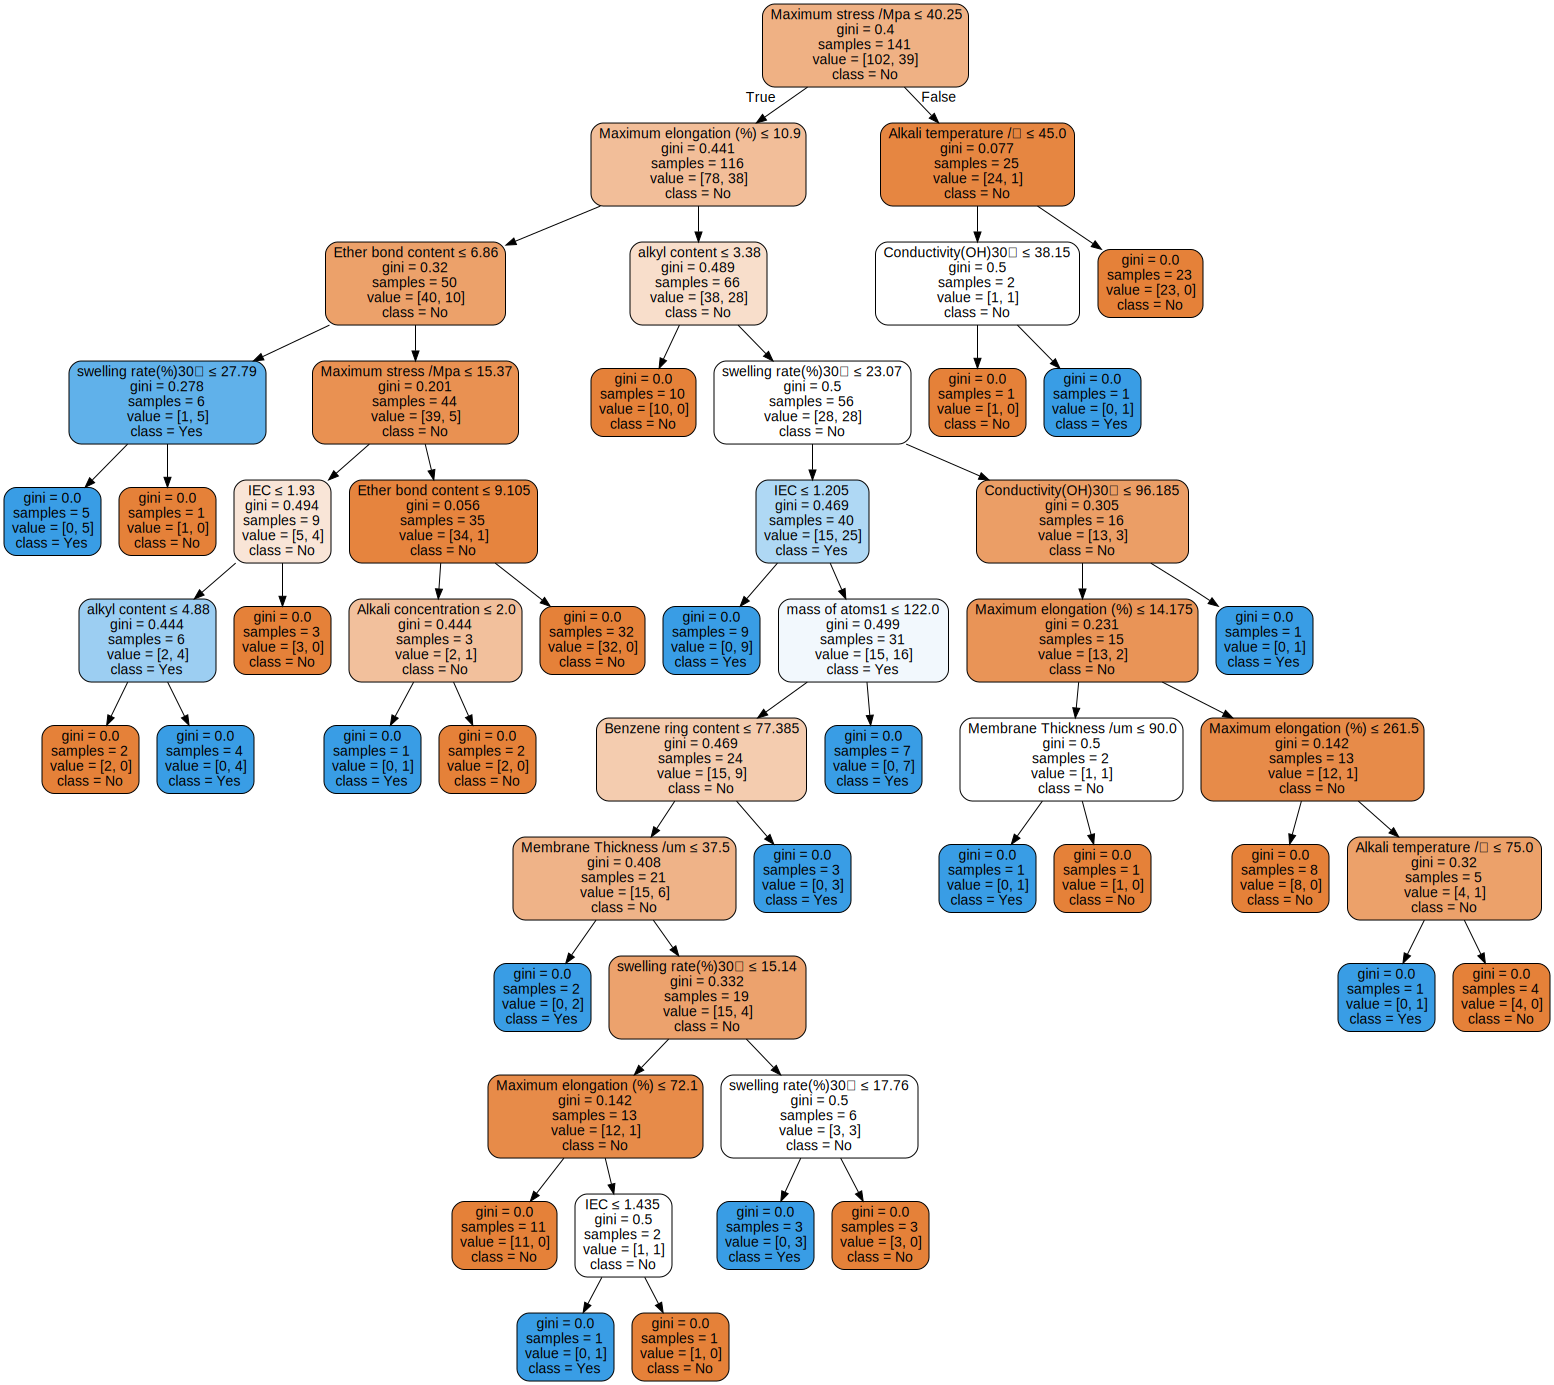

In [73]:
###########visualization##########
graph

In [74]:
###########generating confusion matrix to evaluate the prediction accuracy##########
from sklearn.metrics import accuracy_score
prediction_train=model.predict(X_train)
prediction_test=model.predict(X_test)
print(classification_report(y_train,prediction_train))
print(classification_report(y_test,prediction_test))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00       102
        1.0       1.00      1.00      1.00        39

avg / total       1.00      1.00      1.00       141

             precision    recall  f1-score   support

        0.0       0.80      0.63      0.71        19
        1.0       0.30      0.50      0.37         6

avg / total       0.68      0.60      0.63        25



In [78]:
feature_names=[
              'Conductivity(OH)30℃',
              'IEC',
              'water uptake(%)30℃',
              'swelling rate(%)30℃',
              'Maximum elongation (%)',
              'Maximum stress /Mpa',
              'Membrane Thickness /um',
              'Alkali concentration',
              'Alkali temperature /℃',
              'Ether bond content',
              'alkyl content',
              'Benzene ring content',
              'mass of atoms1',
              'mass of atoms2']
def plot_importance(x,model):
    features = model.feature_importances_
    labels = x
    _ = {'labels':labels,'features':features}
    df = pd.DataFrame(_)
    df= df.set_index('labels').sort_values(by='features',ascending=False)
    df.plot.bar(rot=45)

best_model=grid.best_estimator_
print(best_model.feature_importances_)
plot_importance(feature_names,best_model)
plt.show()

[ 0.04268162  0.10711298  0.          0.18628628  0.08105984  0.10418012
  0.05769798  0.02362996  0.04466063  0.10773883  0.12244618  0.04747091
  0.07503467  0.        ]


In [62]:
###########generate a PDF file containing the figure
graph.render('decisiontree-mass')

'decisiontree-mass.pdf'

In [75]:
print('Best Regressor:',grid.best_params_,'Best Score:', grid.best_score_) 

Best Regressor: {'criterion': 'gini', 'max_depth': 11} Best Score: 0.716312056738


In [77]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_true = y_train, y_pred = prediction_train)
cm2 = confusion_matrix(y_true = y_test, y_pred = prediction_test)
print(cm1)
print(cm2)

[[102   0]
 [  0  39]]
[[12  7]
 [ 3  3]]
